In [10]:
# GPT-2 Small Specifications
num_layers = 12
num_heads = 12
vocab_size = 55236
hidden_dim = 768
seq_length = 2048

# Memory for token embeddings
token_embeddings = vocab_size * hidden_dim * 4  # 4 bytes per float32

# Memory for position embeddings
position_embeddings = seq_length * hidden_dim * 4

# Memory for layer parameters (assuming layer normalization, attention, and feedforward for each layer)
layer_norm = 2 * hidden_dim * 4  # 2 for scale and bias
attention = 4 * hidden_dim * hidden_dim * 4  # Query, Key, Value, and Output matrices
feedforward = 4 * hidden_dim * hidden_dim * 4  # Two linear layers, typically 4x expansion
layer_params = (layer_norm + attention + feedforward) * num_layers

# Memory for attention cache
attention_cache = num_layers * num_heads * seq_length * (hidden_dim // num_heads) * 2 * 4  # Key and Value states

# Memory for activations (rough estimate, varies during inference)
activations = seq_length * hidden_dim * 4 * 3  # Rough estimate for main activations

# Total memory
total_memory = token_embeddings + position_embeddings + layer_params + attention_cache + activations

# Convert to GB
total_memory_gb = total_memory / (1024**3)

print(f"Estimated memory usage: {total_memory_gb:.2f} GB")

Estimated memory usage: 0.53 GB


In [6]:
# save in a format readable by c
import numpy as np
import torch

data = torch.load('pytorch_model.bin', map_location='cpu')

In [ ]:
for i in data.keys():
    print(i, data[i].shape)

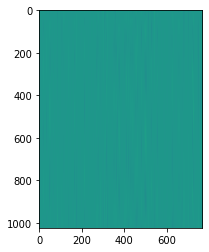

In [9]:
# plot wpe.weight

import matplotlib.pyplot as plt
wpe = data['wpe.weight'].numpy()

plt.imshow(wpe)

In [3]:
data['h.0.attn.c_proj.weight'].shape

torch.Size([768, 768])

In [9]:
import os
os.makedirs("gpt_weights", exist_ok=True)
for key in data.keys():
    if "attn.c_attn" in key:
        # split to q, k, v
        q, k, v = np.split(data[key].numpy(), 3, axis=-1)
        print(q.shape, k.shape, v.shape, data[key].shape)
        # q.tofile(f"gpt_weights/{key}.q.bin")
        # k.tofile(f"gpt_weights/{key}.k.bin")
        # v.tofile(f"gpt_weights/{key}.v.bin")
    else:
        pass
        # data[key].numpy().tofile(f"gpt_weights/{key}.bin")
        # print(data[key].numpy().shape)

# save transpose of wte.weight as etw.weight

etw = data['wte.weight'].numpy().T
etw.tofile("gpt_weights/etw.weight.bin")

(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 76

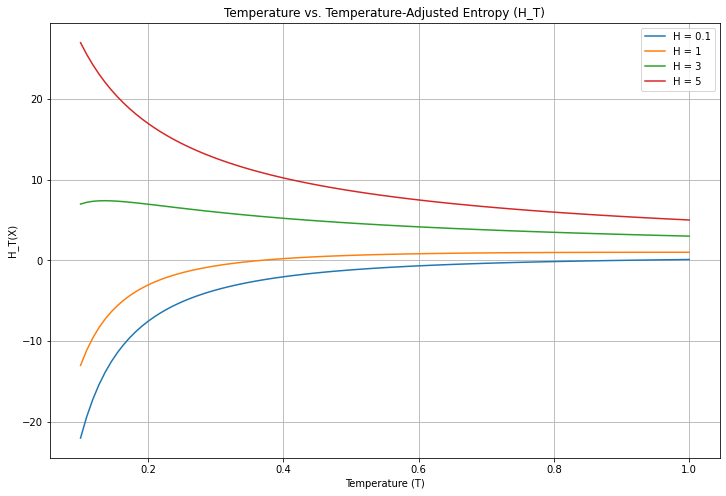

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the entropy values
H_values = [0.1, 1, 3, 5]

# Define the range for temperature
T_values = np.linspace(0.1, 1, 100)

# Calculate H_T for each H and T
def H_T(H, T):
    return H / T + np.log(T) / T

# Plotting
plt.figure(figsize=(12, 8))
for H in H_values:
    HT_values = H_T(H, T_values)
    plt.plot(T_values, HT_values, label=f'H = {H}')

plt.xlabel('Temperature (T)')
plt.ylabel('H_T(X)')
plt.title('Temperature vs. Temperature-Adjusted Entropy (H_T)')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
model.config._attn_implementation = 'eager'

GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.42.4",
  "use_cache": true,
  "vocab_size": 50257
}

In [3]:
from transformers import GPT2Tokenizer, GPT2Model
# import model for text generation
from transformers import AutoModelForCausalLM

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = AutoModelForCausalLM.from_pretrained('gpt2')
# model = GPT2Model.from_pretrained('gpt2')

# calculate entropy of output.logits[0][-1]

import torch.nn.functional as F
import numpy as np
import torch

In [10]:
encoded_input

{'input_ids': tensor([[15496,    11,   616,  1438,   318,   220]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [33]:
text = "Hello, my name is"
encoded_input = tokenizer(text, return_tensors='pt')
input_ids = encoded_input['input_ids']
# print(encoded_input['input_ids'].shape)


for i in range(100):
    output = model(input_ids, output_hidden_states=True)
    # print(tokenizer.decode(output.logits.argmax(2)[0][-1]))
    logits = output.logits[0][-1]
    probs = F.softmax(logits, dim=-1)
    entropy = -torch.sum(probs * torch.log(probs), dim=-1)
    print(entropy.item())
    token = torch.multinomial(probs, 1)
    # print(token)
    input_ids = torch.cat([input_ids, token.unsqueeze(0)], dim=-1)

print(tokenizer.decode(input_ids[0]))
    

7.6633501052856445
5.716493129730225
4.899936199188232
5.059242248535156
0.2908230125904083
5.74310827255249
1.5726962089538574
3.923997163772583
3.6622202396392822
4.971357345581055
3.0886266231536865
2.2112884521484375
5.5584211349487305
5.705196380615234
0.00269798724912107
5.461408615112305
3.820371627807617
5.155567169189453
7.482385635375977
6.324735164642334
5.61191987991333
5.796581268310547
4.680413246154785
5.531380653381348
0.002950024791061878
5.745975494384766
4.094760894775391
5.738474369049072
2.299912929534912
4.392082691192627
4.109862804412842
3.7297985553741455
6.725366592407227
1.6778080463409424
2.565103769302368
4.100427150726318
2.8439579010009766
0.0036910332273691893
5.221877574920654
4.118978023529053
4.963592052459717
3.6275196075439453
5.500770568847656
1.6828666925430298
3.2893247604370117
0.003938079345971346
4.844231128692627
4.598397254943848
4.182580471038818
3.5196447372436523
3.8419222831726074
2.003925323486328
2.146571397781372
2.185673236846924
3.0

In [27]:
probs

tensor([1.8466e-04, 1.0025e-04, 1.4836e-06,  ..., 3.6671e-08, 3.1466e-08,
        3.8015e-05], grad_fn=<SoftmaxBackward0>)

In [16]:
torch.argmax(logits, dim=-1).unsqueeze(0).unsqueeze(0)

tensor([[29343]])

In [41]:
output['hidden_states'][0][0].detach().numpy().tofile("gpt_weights/input.bin")
output.logits[0].detach().numpy().tofile("gpt_weights/output.bin")

In [12]:
out = model.generate(encoded_input['input_ids'], max_length=109, do_sample=False)
out, tokenizer.decode(out[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


(tensor([[15496,    11,   616,  1438,   318,  1757,    13,   314,  1101,   257,
           6260,    11,   290,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314]]),
 "Hello, my name is John. I'm a writer, and I'm a writer. I'm a writer. I'm a writer. I'm a writer. I'm a writer. I'm a writ

In [ ]:
15496,    11,   616,  1438,   318,  1757,    13,   314,  1101, 257,
6260, 11, 290, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101,
257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101,
257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101,
257, 6260, 13, 314,

In [9]:
out = [257, 6260, 11, 290, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314]
out2 = [257,
           6260,    11,   290,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101]

In [11]:
out == out2

False

In [10]:
for i in range(len(out)):
    if out[i] != out2[i]:
        print(i, out[i], out2[i])

In [8]:
tokenizer.decode([257,6260,11,290,314,1101,257,6260,13,314,1101,257,6260,13,314,1101,257,6260,13,314,1101,257,6260,13])

" a writer, and I'm a writer. I'm a writer. I'm a writer. I'm a writer."